<a href="https://colab.research.google.com/github/SameerR007/Machine-Learning/blob/main/handwrittendigit_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit recognition using Artificial Neural Network(ANN) and Convolutional Neural Network(CNN)

#Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Loading the data

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

1. Training size is 60000 and test size is 10000.
2. Each sample is 28x28 size.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Each sample contains value between 0 and 255 which denotes pixel.

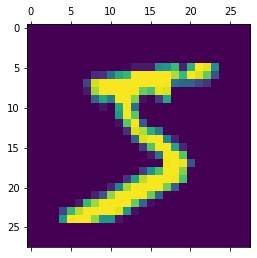

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

#Scaling the features between 0 and 1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Implementing Artificial Neural Network(ANN)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2675 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0847 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9773


[0.08356986939907074, 0.9772999882698059]

1. We get accuracy of 97.73 % with ANN

#Implementing Convolutional Neural Network(CNN)

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1455 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0202 - accuracy: 0.9933


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0427 - accuracy: 0.9856


[0.04266337305307388, 0.9855999946594238]

1. Here we get the accuracy of 98.56% that too in only 5 epochs with CNN.




In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_pred[:5]

array([[6.7716996e-09, 2.3155511e-08, 1.5669694e-07, 1.5273577e-07,
        1.4410131e-10, 1.7155699e-09, 1.0331833e-12, 9.9999881e-01,
        8.1311402e-09, 8.1405057e-07],
       [2.8191785e-06, 1.1062283e-05, 9.9998581e-01, 2.3074058e-07,
        3.3865240e-11, 8.1259209e-12, 2.9308916e-08, 1.7176323e-10,
        6.7507358e-08, 1.7036108e-08],
       [1.7615921e-08, 9.9997795e-01, 2.0024336e-08, 2.4725882e-10,
        1.3408690e-05, 3.4697072e-07, 9.5692565e-07, 4.6577631e-07,
        6.9015241e-06, 4.5757545e-08],
       [9.9999356e-01, 2.9958258e-09, 1.6214560e-09, 1.5684405e-08,
        1.5310807e-10, 2.3115499e-08, 4.6160758e-06, 8.2613263e-07,
        6.6739858e-08, 8.7048045e-07],
       [9.1908367e-07, 2.6749896e-05, 4.2368560e-05, 8.5568229e-07,
        9.9946827e-01, 8.2341035e-07, 1.1198988e-06, 7.7418990e-06,
        2.8116126e-06, 4.4836840e-04]], dtype=float32)

1. We get 10 predicted values for each sample in the test set(corresponding to probability of 0 to 9). 

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

1. Here we take maximum index for each sample to denote number between 0 and 9.

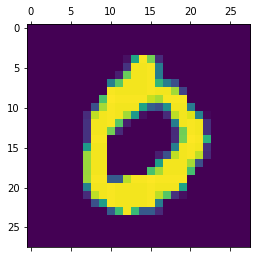

In [ ]:
plt.matshow(X_test[3])

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

We can compare y predicted(y_classes) with y test(y_test) and see that our model has correcty predicted the digits.